In [1]:
import pandas as pd
import numpy as np
import yaml
import copy
import matplotlib
import matplotlib.pyplot as plt
import warnings
import random
import collections
warnings.filterwarnings("ignore")
matplotlib.use('TkAgg')
import networkx as nx
%matplotlib inline

In [2]:
pwd

'/Users/nishant/Desktop/PNNL-2019/Flood_Failure'

In [3]:
def import_network(path):
    """
    path = path to network data
    df = imported network data as a pandas dataframe
    """
    
    df = pd.read_csv(path, sep=" ", 
                 header=None,
                 names=['layer','node1','node2','weight'])
    
    return df


def create_edge_list(df, n_layers):
    
    edges = []
    for i in range(n_layers):
        edges.append(list(zip(df["node1"][df.layer==i+1], df["node2"][df.layer==i+1])))
    
    return edges


def calculate_gc_size(graph):
    """
    gc = giant component
    """
    
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    
    return gc_size


def calculate_diameter(graph):
    return nx.diameter(graph)

def normalize_gc_list(gc_list):
    
    return np.array(gc_list)/max(gc_list)

In [4]:
if __name__ == "__main__":
    
    with open("config.yml", 'r') as f:
        config = yaml.safe_load(f)
        path = config['path']
        n_layers = config['n_layers']
        df = import_network(path)
        edges = create_edge_list(df, n_layers)
        

In [5]:
layer_1 = 1
layer_2 = 2
layer_3 = 3

edge_list_1 = edges[layer_1-1]
edge_list_2 = edges[layer_2-1]
edge_list_3 = edges[layer_3-1]


print(len(edge_list_1))
print(len(edge_list_2))
print(len(edge_list_3))


312
83
46


In [6]:
def node_list(df, layer):
    
    temp = list(set(df.node1[df.layer==layer]))
    temp2 = list(set(df.node2[df.layer==layer]))
    node_list = list(set(temp+temp2))
    
    return node_list

In [7]:
node_list_1 = node_list(df, layer_1)
node_list_2 = node_list(df, layer_2)
node_list_3 = node_list(df, layer_3)

print(len(node_list_1))
print(len(node_list_2))
print(len(node_list_3))



271
83
45


In [8]:
G1 = nx.Graph()
G1.add_edges_from(edge_list_1)

G2 = nx.Graph()
G2.add_edges_from(edge_list_2)

G3 = nx.Graph()
G3.add_edges_from(edge_list_3)


#plt.figure(figsize=(20,12))
#nx.draw(G)

In [9]:
agg_edges = edge_list_1 + edge_list_2 + edge_list_3

In [10]:
len(agg_edges)

441

In [11]:
agg_edges = list(set(agg_edges))    #take out common edges across layers
len(agg_edges)

430

In [12]:
agg_G = nx.Graph()
agg_G.add_edges_from(agg_edges)

In [13]:
"Which Graph to Analyze"

G = agg_G
edge_list = agg_edges

node_list = list(range(len(list(G.nodes))))
len(node_list)

369

In [14]:
def calculate_gc_size(graph):
    """
    gc = giant component
    """
    
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    
    return gc_size


def calculate_diameter(graph):
    
    return nx.diameter(graph)


def n_connected_components(graph):
    
    return nx.number_connected_components(graph)


def normalize_gc_list(gc_list):
    
    return np.array(gc_list)/max(gc_list)

In [15]:
initial_gc_size = calculate_gc_size(G)
print(initial_gc_size)

369


In [16]:
"""

#Create all sorted node lists here for removal/addition

#DEGREE
sorted_nodes_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)
sorted_nodes_by_degree = [i[0] for i in sorted_nodes_by_degree]


#BETWEENNESS
betweenness_c = nx.betweenness_centrality(G)
temp = sorted(betweenness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_betweenness = [i[0] for i in temp]


#EIGENVALUE
eigen_c = nx.eigenvector_centrality_numpy(G)
temp = sorted(eigen_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_eigenc = [i[0] for i in temp]

#CLOSENESS
closeness_c = nx.closeness_centrality(G)
temp = sorted(closeness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_closeness = [i[0] for i in temp]

#CLUSTERING
clustering_c = nx.clustering(G)
temp = sorted(clustering_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_clustering = [i[0] for i in temp]


print(sorted_nodes_by_clustering)
print('\n', len(sorted_nodes_by_clustering))

""";

In [17]:

"""RANDOM"""
node_list_copy = copy.deepcopy(node_list)

sorted_nodes_by_random = []

for i in range(100):
    sorted_nodes_by_random.append(random.sample(node_list_copy, 65))
    
print(len(sorted_nodes_by_random[0]))
    

65


In [18]:

def remove_nodes(G, nodes_to_remove, edge_list):

    """
    nodes_to_remove: list

    edge_list: for this layer the orginal list of tuples (edges)
                e.g. [(1,77), (4,13)..]

    returns list of GC sizes as the network fails and the graph remaining 
    """

    
    """initialize updated_edges list with original edge_list"""
    updated_edges = copy.deepcopy(edge_list)
    
    """initialize updated_G with orginial graph G"""
    updated_G = copy.deepcopy(G)
    initial_gc_size = calculate_gc_size(G)
    
    """empty list which will capture gc size as the network fails"""
    gc_list = []
    gc_list.append(initial_gc_size)
    count = 0

    for node in nodes_to_remove:
        
        updated_G.remove_edges_from(list(G.edges(node)))
        
        gc_list.append(calculate_gc_size(updated_G))
        updated_G.remove_node(node)
    
        count +=1
    
    if len(nodes_to_remove) == len(G.nodes()):
        gc_list.append(0)
    
    return gc_list, updated_G, count




In [19]:
"""

#FAILURE

nodes_to_remove = sorted_nodes_by_degree
gc_list_by_degree, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_betweenness
gc_list_by_betweenness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_eigenc
gc_list_by_eigenc, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_closeness
gc_list_by_closeness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_clustering
gc_list_by_clustering, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

""";

In [20]:
# #FAILURE

"""RANDOM"""

gc_list_by_random = []
updated_G_list = []

for i in range(100):
    nodes_to_remove = sorted_nodes_by_random[i]
    gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
    gc_list_by_random.append(normalize_gc_list(gc_temp))
    updated_G_list.append(updated_G_temp)


In [21]:
def add_nodes(G, updated_G, nodes_to_add, edge_list):
    
    """re: recovery
    """
    
    """initialize the graph object with the graph (updated_G) remaining post failure"""
    re_updated_G = copy.deepcopy(updated_G)
    edges_to_add = copy.deepcopy(edge_list)
     
    """empty list which will capture gc size as the network recovers"""
    re_gc_list = []
    count = 0
    initial_gc_size = calculate_gc_size(G)
    
    if len(nodes_to_add) != len(G.nodes()):
        re_gc_list.append(calculate_gc_size(re_updated_G))
    
    for node in nodes_to_add:
        
        re_updated_G.add_node(node)
        re_updated_G.add_edges_from(list(G.edges(node)))
        re_gc_list.append(calculate_gc_size(re_updated_G))
    
    
    #re_gc_list.append(initial_gc_size)
    
    return re_gc_list, re_updated_G, count



In [22]:
"""
#RECOVERY


nodes_to_add = sorted_nodes_by_degree
re_gc_list_by_degree, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_betweenness
re_gc_list_by_betweenness, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_eigenc
re_gc_list_by_eigenc, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_closeness
re_gc_list_by_closeness, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_clustering
re_gc_list_by_clustering, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)
""";

In [23]:
"""RECOVERY - RANDOM"""

#Nodes to Add

re_gc_list_by_random = []
re_updated_G_list = []

for i in range(100):
    nodes_to_add = sorted_nodes_by_random[i]
    re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
    re_gc_list_by_random.append(normalize_gc_list(re_gc_temp))
    re_updated_G_list.append(updated_G_temp)


In [24]:
#FAILURE - FOODS


node_list_floods = [106, 6, 221, 345, 35, 180, 56, 69, 343, 44, 261, 57, 102, 214, 70, 176, 277, 257, 351, 90, 105, 132, 172, 316, 195, 202, 203, 349, 328, 241, 319, 337, 103, 333, 129, 254, 218, 352, 347, 12, 65, 290, 324, 50, 51, 325, 146, 66, 104, 239, 107, 108, 142, 323, 136, 137, 256, 143, 144, 145, 154, 197, 155, 269, 291]

sorted_nodes_by_floods = []

for i in range(100):
    sorted_nodes_by_floods.append(random.sample(node_list_floods, len(node_list_floods)))


gc_list_by_floods = []
updated_G_list = []

for i in range(100):
    nodes_to_remove = sorted_nodes_by_floods[i]
    gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
    gc_list_by_floods.append(normalize_gc_list(gc_temp))
    updated_G_list.append(updated_G_temp)


In [25]:
# # #RECOVERY - FLOODS (SAME ORDER AS FAILED)

# # #Nodes to Add

# re_gc_list_by_floods = []
# re_updated_G_list = []

# for i in range(100):
#     nodes_to_add = sorted_nodes_by_floods[i]
#     re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
#     re_gc_list_by_floods.append(normalize_gc_list(re_gc_temp))
#     re_updated_G_list.append(updated_G_temp)


In [26]:
#RECOVERY - FLOODS (BASED ON CEMTRALITY MEASURES)

"DEGREE"
mydict = dict(G.degree(sorted_nodes_by_floods[0]))
sorted_nodes_by_degree = sorted(mydict, reverse=True, key=lambda k: mydict[k])

nodes_to_add = sorted_nodes_by_degree
re_gc_list_by_degree, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_degree = normalize_gc_list(re_gc_list_by_degree)

"BETWEENNESS"
sorted_nodes_by_betweenness = []
my_dict = nx.betweenness_centrality(G)
wanted_keys = sorted_nodes_by_floods[0]
temp = dict((k, my_dict[k]) for k in wanted_keys if k in my_dict)
sorted_nodes_by_betweenness = sorted(temp, reverse=True, key=lambda k: temp[k])

nodes_to_add = sorted_nodes_by_betweenness
re_gc_list_by_betweenness, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_betweenness = normalize_gc_list(re_gc_list_by_betweenness)

"EIGENVECTOR"
sorted_nodes_by_eigenc = []
my_dict = nx.eigenvector_centrality(G)
wanted_keys = sorted_nodes_by_floods[0]
temp = dict((k, my_dict[k]) for k in wanted_keys if k in my_dict)
sorted_nodes_by_eigenc = sorted(temp, reverse=True, key=lambda k: temp[k])

nodes_to_add = sorted_nodes_by_eigenc
re_gc_list_by_eigenc, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_eigenc = normalize_gc_list(re_gc_list_by_eigenc)

"CLOSENESS"
sorted_nodes_by_closeness = []
my_dict = nx.closeness_centrality(G)
wanted_keys = sorted_nodes_by_floods[0]
temp = dict((k, my_dict[k]) for k in wanted_keys if k in my_dict)
sorted_nodes_by_closeness = sorted(temp, reverse=True, key=lambda k: temp[k])

nodes_to_add = sorted_nodes_by_closeness
re_gc_list_by_closeness, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_closeness = normalize_gc_list(re_gc_list_by_closeness)




In [27]:
"""RANDOM FLOOD RECOVERY"""

re_gc_list_by_floods_random = []

for i in range(100):
    nodes_to_add = random.sample(sorted_nodes_by_floods[0], len(sorted_nodes_by_floods[0]))
    temp, re_updated_G, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
    temp = normalize_gc_list(temp)
    re_gc_list_by_floods_random.append(temp)


re_gc_list_by_floods_random_mean = np.mean(np.array(re_gc_list_by_floods_random), axis=0)

print(len(re_gc_list_by_floods_random[0]))
print(len(re_gc_list_by_floods_random_mean))


66
66


In [28]:
"""

#EXTRACT GC SIZE LISTS

np.save('agg_gc_list_by_random', gc_list_by_random)
np.save('agg_re_gc_list_by_random', re_gc_list_by_random)

np.save('agg_gc_list_by_degree', gc_list_by_degree)
np.save('agg_re_gc_list_by_degree', re_gc_list_by_degree)

np.save('agg_gc_list_by_betweenness', gc_list_by_betweenness)
np.save('agg_re_gc_list_by_betweenness', re_gc_list_by_betweenness)

np.save('agg_gc_list_by_eigenc', gc_list_by_eigenc)
np.save('agg_re_gc_list_by_eigenc', re_gc_list_by_eigenc)

np.save('agg_gc_list_by_closeness', gc_list_by_closeness)
np.save('agg_re_gc_list_by_closeness', re_gc_list_by_closeness)

np.save('agg_gc_list_by_clustering', gc_list_by_clustering)
np.save('agg_re_gc_list_by_clustering', re_gc_list_by_clustering)

""";

In [29]:
#Ensemble Mean - Random

gc_array_by_random = np.array(gc_list_by_random)
re_gc_array_by_random = np.array(re_gc_list_by_random)


gc_list_by_random_mean = np.mean(gc_array_by_random, axis=0)
re_gc_list_by_random_mean = np.mean(re_gc_array_by_random, axis=0)



In [30]:
# #Ensemble Mean - Floods

# gc_array_by_floods = np.array(gc_list_by_floods)
# re_gc_array_by_floods = np.array(re_gc_list_by_floods)


# gc_list_by_floods_mean = np.mean(gc_array_by_floods, axis=0)
# re_gc_list_by_floods_mean = np.mean(re_gc_array_by_floods, axis=0)



In [31]:

#np.save('agg_gc_list_by_random', gc_by_random_mean)
#np.save('agg_re_gc_list_by_random', re_gc_by_random_mean)

In [32]:
# np.save('agg_gc_list_by_floods', gc_by_floods_mean)
# np.save('agg_re_gc_list_by_floods', re_gc_by_floods_mean)

In [33]:
# node_frac = np.arange(len(gc_list_by_floods[0]))/(len(gc_list_by_floods[0])-1)
# len(node_frac)

In [34]:
node_frac = np.arange(len(gc_list_by_floods[0]))
len(node_frac)

66

In [35]:
"""Load Random-Local Case"""

gc_list_by_random_local = np.load('agg_gc_list_by_random_local.npy')
re_gc_list_by_random_local = np.load('agg_re_gc_list_by_random_local.npy')

gc_list_by_random_local_mean = np.load('agg_gc_list_by_random_local_mean.npy')
re_gc_list_by_random_local_mean = np.load('agg_re_gc_list_by_random_local_mean.npy')


"""Load Targeted Failure Case (Betweenness)"""

gc_list_by_betweenness = np.load('agg_gc_list_by_betweenness.npy')
#re_gc_list_by_betweenness = np.load('agg_re_gc_list_by_betweenness.npy')


"""Load Flood-Geo Case"""

gc_list_by_floods_geo = np.load('agg_gc_list_by_floods_geo.npy')
re_gc_list_by_floods_geo = np.load('agg_re_gc_list_by_floods_geo.npy')

gc_list_by_floods_geo_mean = np.load('agg_gc_list_by_floods_geo_mean.npy')
re_gc_list_by_floods_geo_mean = np.load('agg_re_gc_list_by_floods_geo_mean.npy')


"""Load Failure Case for Flood + Targeted"""
gc_list_by_floods_targeted = np.load('gc_list_by_floods_targeted.npy')
gc_list_by_floods_targeted_mean = np.load('gc_list_by_floods_targeted_mean.npy')


In [36]:
len(gc_list_by_floods_targeted[0])

66

In [31]:
node_frac = np.arange(66)

In [ ]:
plt.figure(figsize=(12,8))

for i in range(100):

    plt.subplot(1,2,1)
    
    plt.plot(node_frac, gc_list_by_floods_geo[i],'s', alpha=0.010, markevery=5)
    plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', alpha=0.1, markevery=5)
    
    plt.plot(node_frac, gc_list_by_random[i],'X', alpha=0.010, markevery=5)
    plt.plot(node_frac, gc_list_by_random_mean,'b--d', alpha=0.1, markevery=5)
    
    plt.plot(node_frac, gc_list_by_random_local[i],'X', alpha=0.005, markevery=5)
    plt.plot(node_frac, gc_list_by_random_local_mean,'g--X',alpha=0.01, markevery=5)
    
    plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', markevery=5, alpha=0.01)

    

    plt.ylim(top=1, bottom=0)
    #plt.xlim(left=0, right=1)
    plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
    plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
    plt.title('Failure')
    plt.margins(x=0, y=0)
    
plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_random_mean,'b--d', label='random', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_random_local_mean,'g--X', label='random-local', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', label='targeted \n(betweenness)', markevery=5, alpha=0.5)

plt.legend(fontsize=11)


for i in range(100):
    
    plt.subplot(1,2,2)    
    
    plt.plot(node_frac, re_gc_list_by_floods_geo[i],'s', alpha=0.010, markevery=5)
    plt.plot(node_frac, re_gc_list_by_floods_geo_mean,'r--s', alpha=0.1, markevery=5)
    
    plt.plot(node_frac, re_gc_list_by_random[i],'X', alpha=0.010, markevery=5)
    plt.plot(node_frac, re_gc_list_by_random_mean,'b--d', alpha=0.1, markevery=5)
    plt.plot(node_frac, re_gc_list_by_random_local[i],'X', alpha=0.005, markevery=5)
    plt.plot(node_frac, re_gc_list_by_random_local_mean,'g--X',alpha=0.01, markevery=5)
    
    plt.plot(node_frac, re_gc_list_by_betweenness[:66],'m--o', markevery=5, alpha=0.01)

    

    plt.ylim(top=1, bottom=0)
    #plt.xlim(left=0, right=1)
    plt.xlabel('Number of Nodes Added Back', fontsize=12, labelpad=10)
    plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
    plt.title('Recovery')
    plt.margins(x=0, y=0)
    
plt.plot(node_frac, re_gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.5)
plt.plot(node_frac, re_gc_list_by_random_mean,'b--d', label='random', markevery=5, alpha=0.5)
plt.plot(node_frac, re_gc_list_by_random_mean,'g--X', label='random-local', markevery=5, alpha=0.5)
plt.plot(node_frac, re_gc_list_by_betweenness[:66],'m--o', label='targeted \n(betweenness)', markevery=5, alpha=0.5)

plt.legend(fontsize=11)


plt.subplots_adjust(wspace=0.3)
plt.suptitle('Flood Induced vs Other Failures (Affected Nodes = 65)', y=0.95, fontsize='14')
#plt.savefig('flood-vs-random-ensemble.pdf')
plt.show()

In [ ]:
re_gc_list_by_betweenness

In [ ]:
#PLOTTING FLOOD GEO FAIURE vs CENTRALITY BASED RECOVERIES

plt.figure(figsize=(12,8))

for i in range(100):

    plt.subplot(1,3,1)

    plt.plot(node_frac, gc_list_by_floods_geo[i],'s', alpha=0.010, markevery=5)
    plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', alpha=0.1, markevery=5)
    
    plt.plot(node_frac, gc_list_by_random[i],'X', alpha=0.010, markevery=5)
    plt.plot(node_frac, gc_list_by_random_mean,'b--d', alpha=0.1, markevery=5)
    
    plt.plot(node_frac, gc_list_by_random_local[i],'X', alpha=0.005, markevery=5)
    plt.plot(node_frac, gc_list_by_random_local_mean,'g--X',alpha=0.01, markevery=5)
    
    plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', markevery=5, alpha=0.01)

    

    plt.ylim(top=1, bottom=0)
    #plt.xlim(left=0, right=1)
    plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
    plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
    plt.title('Failure')
    plt.margins(x=0, y=0)
    
plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_random_mean,'b--d', label='random', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_random_local_mean,'g--X', label='random-local', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', label='targeted \n(betweenness)', markevery=5, alpha=0.5)

plt.legend(fontsize=11)



plt.subplot(1,3,2)

for i in range(100):
    plt.plot(node_frac, gc_list_by_floods_geo[i],'rs', alpha=0.050, markevery=5)
    plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', alpha=0.05, markevery=5)


plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.8)
    
plt.ylim(top=1, bottom=0)
#plt.xlim(left=0, right=1)
plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
#plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
plt.title('Failure')
plt.margins(x=0, y=0)
    
plt.legend(fontsize=11)

    
plt.subplot(1,3,3)    
    
plt.plot(node_frac, re_gc_list_by_degree,'b--*', label='#degree', markevery=5, alpha=0.8)
plt.plot(node_frac, re_gc_list_by_betweenness,'g--d', label='#betweenness', markevery=5, alpha=0.8)
plt.plot(node_frac, re_gc_list_by_eigenc,'m--x', label='#eigenc', markevery=5, alpha=0.8)
plt.plot(node_frac, re_gc_list_by_closeness,'c--1', label='#closeness', markevery=5, alpha=0.8)
plt.plot(node_frac, re_gc_list_by_floods_random_mean,'k--p', label='#random', markevery=5, alpha=0.8)



plt.ylim(top=1, bottom=0)
#plt.xlim(left=0, right=1)
plt.xlabel('Number of Nodes Added Back', fontsize=12, labelpad=10)
#plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
plt.title('Recovery')
plt.margins(x=0, y=0)
plt.legend(fontsize=11)


plt.subplots_adjust(wspace=0.1)
plt.suptitle('Flood Induced Failure and Recovery Strategies (Affected Nodes = 65)', y=0.95, fontsize='14')
#plt.savefig('flood-vs-random-ensemble.pdf')
plt.show()

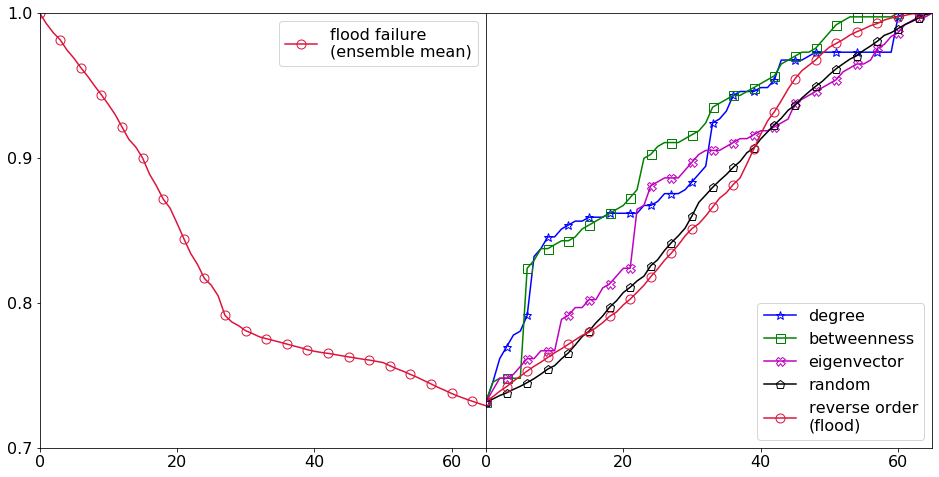

In [44]:
grid = plt.GridSpec(1, 2, wspace=0, hspace=0.2)
plt.figure(figsize=(16,8))

"""SUBPLOT 1"""
# plt.subplot(grid[0, 0])
# for i in range(10):
#     plt.plot(node_frac, gc_list_by_floods_geo[i],'rs', alpha=0.1, markevery=5)
#     plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', alpha=0.1, markevery=5)
    
#     plt.plot(node_frac, gc_list_by_random[i],'bs', alpha=0.1, markevery=5)
#     plt.plot(node_frac, gc_list_by_random_mean,'b--d', alpha=0.1, markevery=5)
    
#     plt.plot(node_frac, gc_list_by_random_local[i],'gX', alpha=0.1, markevery=5)
#     plt.plot(node_frac, gc_list_by_random_local_mean,'g--X',alpha=0.01, markevery=5)
    
#     #plt.plot(node_frac, gc_list_by_floods_targeted[i],'ks', alpha=0.1, markevery=5)
#     #plt.plot(node_frac, gc_list_by_floods_targeted_mean,'k--P', alpha=0.1, markevery=5)
    
#     #plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', markevery=5, alpha=0.01)

#     plt.ylim(top=1, bottom=0)
#     #plt.xlim(left=0, right=1)
#     plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
#     plt.ylabel(r'P$\infty$', fontsize=20, labelpad=10)
#     plt.title('Failure')
#     plt.margins(x=0, y=0)
    
# plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.5)
# plt.plot(node_frac, gc_list_by_random_mean,'b--d', label='random', markevery=5, alpha=0.5)
# plt.plot(node_frac, gc_list_by_random_local_mean,'g--X', label='random-local', markevery=5, alpha=0.5)

# plt.legend(fontsize=11)
# plt.text(0,1.07, "(a)", fontsize=16, weight='bold')

# """SUBPLOT 2"""
# plt.subplot(grid[0, 1])

# for i in range(10):
#     plt.plot(node_frac, gc_list_by_floods_geo[i],'rs', alpha=0.1, markevery=5)
#     plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', alpha=0.1, markevery=5)
    
#     plt.plot(node_frac, gc_list_by_floods_targeted[i],'ks', alpha=0.1, markevery=5)
#     plt.plot(node_frac, gc_list_by_floods_targeted_mean,'k--P', alpha=0.1, markevery=5)
    
#     plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', markevery=5, alpha=0.01)

# plt.ylim(top=1, bottom=0)
# #plt.xlim(left=0, right=1)
# plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
# #plt.ylabel(r'P$\infty$', fontsize=20, labelpad=10)
# plt.title('Failure')
# plt.margins(x=0, y=0)


# plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.5)
# plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', label='targeted\n(degree)', markevery=5, alpha=0.8)
# plt.plot(node_frac, gc_list_by_floods_targeted_mean,'k--P',label='compound\n(flood+targeted)', markevery=5, alpha=0.5)

# plt.legend(fontsize=11)
# plt.text(0,1.07, "(b)", fontsize=16, weight='bold')

"""SUBPLOT 3"""
plt.subplot(grid[0, 0])
plt.plot(node_frac, gc_list_by_floods_geo_mean,'-o', color='crimson', label='flood failure\n(ensemble mean)', markersize=9, markerfacecolor='none', markevery=3, alpha=1)
    
plt.ylim(top=1, bottom=0.7)
#plt.xlim(left=0, right=1)
#plt.xlabel('Number of Nodes Removed (total=65)', fontsize=12, labelpad=10)
#plt.ylabel('Relative Giant Component Size', fontsize=12, labelpad=10)
#plt.title('Failure')
plt.margins(x=0, y=0)
plt.yticks([0.7,0.8,0.9,1], fontsize=16)
plt.xticks([0,20,40,60], fontsize=16)


#plt.text(0,1.03, "a", fontsize=16, weight='bold')
plt.legend(fontsize=16)


"""SUBPLOT 4"""
plt.subplot(grid[0, 1])

plt.plot(node_frac, re_gc_list_by_degree,'-*', color='blue', label='degree', markersize=9, markerfacecolor='none', markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_betweenness,'g-s', label='betweenness',markersize=9, markerfacecolor='none', markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_eigenc,'m-X', label='eigenvector',markersize=9, markerfacecolor='none',markevery=3, alpha=1)
#plt.plot(node_frac, re_gc_list_by_closeness,'c-P', label='#closeness',markersize=10, markerfacecolor='none', markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_floods_random_mean,'k-p', label='random', markersize=9, markerfacecolor='none',markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_floods_geo_mean,'-o', color='crimson', markersize=9, label='reverse order\n(flood)', markerfacecolor='none', markevery=3, alpha=1)



plt.ylim(top=1, bottom=0.7)
#plt.xlim(left=0, right=1)
#plt.xlabel('Number of Nodes Added Back (total=65)', fontsize=12, labelpad=10)
#plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
#plt.title('Recovery')
plt.margins(x=0, y=0)
plt.legend(fontsize=16, loc='lower right')
plt.xticks([0,20,40,60], fontsize=16)
plt.yticks([])
#plt.text(0,1.03, "b", fontsize=16, weight='bold')

plt.savefig('flood-recovery.pdf', dpi=1200, bbox_inches='tight')
plt.show()